In [58]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
import random
import time
import h5py

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

from rebergrammar_generator import *
from experimentor import Experimentor
#rom ufuncs import *
from ufuncs import full_pickle, unpickle, compress_pickle, decompress_pickle

import os
os.getcwd()

# np.set_printoptions(threshold=sys.maxsize)

ImportError: cannot import name 'full_pickle' from 'ufuncs' (/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation/ufuncs.py)

### Param Settings

In [2]:
# Network params
M = 8
N = 175
k = 25

perm_decrement = 0.05 # p-
perm_increment = 2*perm_decrement # p+
perm_decay = 0.2*perm_decrement # p--
perm_boost = 0.1*perm_decrement # p++

# Cell params
dendrites_percell = 32
connSynapses_perdend = 32 # not functional, at the moment
nmda_threshold = 20
permanence_threshold = 0.40
init_permanence = 0.25
activity_horizon = None
activity_threshold = None

# Task params
do_ERG = False
nof_strings = 2000

### Experiment Initializer and Launcher

In [3]:
start = time.time()

exp = Experimentor(M=M, N=N, k=k, n_dendrites=dendrites_percell, n_synapses=connSynapses_perdend, 
                   nmda_th=nmda_threshold, perm_th=permanence_threshold, perm_init=init_permanence, 
                   perm_decrement=perm_decrement, perm_increment=perm_increment, 
                   perm_decay=perm_decay, perm_boost=perm_boost,
                   activity_horizon=activity_horizon, activity_th=activity_threshold,
                   do_ERG=do_ERG, nof_strings=nof_strings)

In [4]:
dict_results = exp.run_experiment()

print(time.time()-start)

# 3606 secs for 1000 strings
# 19374 secs for 5000 strings
# 7845 secs for 2000 strings

7058.9821701049805


In [36]:
if do_ERG:
    exp_filename = 'ERG_'+str(nof_strings)+'strings'
else:
    exp_filename = 'SRG_'+str(nof_strings)+'strings'


# USING PICKLE
filename = exp_filename+'_chars_to_minicols'
full_pickle(filename, dict_results['chars_to_minicols'])
filename = exp_filename+'_in_strings_oh'
full_pickle(filename, dict_results['in_strings_onehot'])
filename = exp_filename+'_out_strings_oh'
full_pickle(filename, dict_results['out_strings_onehot'])

filename = exp_filename+'_results'
compress_pickle(filename, dict_results['results'])

# USING HDF5
# with h5py.File(exp_filename+'.hdf5', 'a') as f:
    
#     g1 = f.create_group(trial)
    
#     g1.create_dataset("results", data=dict_results['results'], dtype=h5py.string_dtype(encoding='utf-8'), 
#                       compression="gzip", compression_opts=5)
# #     g1.create_dataset("chars_to_minicols", data=np.array(dict_results['chars_to_minicols']),
# #                       dtype=h5py.vlen_dtype(np.dtype('int32')), compression="gzip", compression_opts=5)
#     g1.create_dataset("in_strings_onehot", data=dict_results['in_strings_onehot'], 
#                       dtype=h5py.vlen_dtype(np.dtype('int32')), compression="gzip", compression_opts=5)
#     g1.create_dataset("out_strings_onehot", data=dict_results['out_strings_onehot'], 
#                       dtype=h5py.vlen_dtype(np.dtype('int32')), compression="gzip", compression_opts=5)

In [22]:
dict_results['chars_to_minicols']

,A,T,S,X,P,V,Z
0,17,4,10,1,8,3,0
1,25,6,26,2,9,16,13
2,35,7,31,5,11,39,23
3,36,12,37,15,14,42,27
4,41,30,38,19,18,53,29
5,45,50,52,20,21,55,32
6,48,72,60,22,34,59,44
7,65,78,62,24,43,63,47
8,69,81,64,28,46,82,49
9,71,83,66,33,54,90,51


In [40]:
if do_ERG:
    exp_filename = 'ERG_'+str(nof_strings)+'strings'
else:
    exp_filename = 'SRG_'+str(nof_strings)+'strings'
    
    
# USING PICKLE
filename = exp_filename+'_chars_to_minicols'
charsMC = unpickle(filename)
filename = exp_filename+'_chars_to_minicols'
in_strings_onehot = unpickle(filename)
filename = exp_filename+'_chars_to_minicols'
out_strings_onehot = unpickle(filename)

filename = exp_filename+'_results'
results = decompress_pickle(filename)

# USING HDF5
# with h5py.File(exp_filename+'.hdf5', 'r') as f:
    
#     results = f[trial+'/results'][()]
#     #charsMC = f[trial+'/chars_to_minicols'][()]
#     in_strings_onehot = f[trial+'/in_strings_onehot'][()]
#     out_strings_onehot = f[trial+'/out_strings_onehot'][()]

# results = pd.DataFrame(results)
# results.columns = ['reber_string', 'htm_states', 'htm_preds', 'htm_preds_dend', 'htm_networks']
# results.set_index('reber_string', inplace=True)

In [60]:
results#.iloc[1555]['htm_network'][0][0].dendrites

,reber_string,htm_states,htm_preds,htm_preds_dend,htm_network
0,ATSXXVTSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
1,APVPXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
2,ATSXVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
3,ATSXVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
4,APVPXVPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
...,...,...,...,...,...
1995,APVPXVPXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
1996,ATXXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
1997,APVTTPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...
1998,APVTPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f28cf3b4850>...


In [59]:
dict_results['results']#.iloc[1555]['htm_network'][0][0].dendrites

,reber_string,htm_states,htm_preds,htm_preds_dend,htm_network
0,ATSXXVTSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1,APVPXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
2,ATSXVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
3,ATSXVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
4,APVPXVPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
...,...,...,...,...,...
1995,APVPXVPXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1996,ATXXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1997,APVTTPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1998,APVTPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...


# Analysis of Results

In [17]:
results = dict_results['results']
charsMC = dict_results['chars_to_minicols']
in_strings_onehot = dict_results['in_strings_onehot']
out_strings_onehot = dict_results['out_strings_onehot']

In [18]:
results

,reber_string,htm_states,htm_preds,htm_preds_dend,htm_network
0,ATSXXVTSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1,APVPXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
2,ATSXVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
3,ATSXVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
4,APVPXVPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, nan...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
...,...,...,...,...,...
1995,APVPXVPXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1996,ATXXVSZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1997,APVTTPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...
1998,APVTPVZ,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0...","[[[nan, nan, nan, nan, nan, nan, nan, nan, [7]...",[[<htm_cell.HTM_CELL object at 0x7f29740ed610>...


In [19]:
charsMC

,A,T,S,X,P,V,Z
0,17,4,10,1,8,3,0
1,25,6,26,2,9,16,13
2,35,7,31,5,11,39,23
3,36,12,37,15,14,42,27
4,41,30,38,19,18,53,29
5,45,50,52,20,21,55,32
6,48,72,60,22,34,59,44
7,65,78,62,24,43,63,47
8,69,81,64,28,46,82,49
9,71,83,66,33,54,90,51


In [9]:
# Generating xticks for plots based on characters-minicols

xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch
    
xticks_plot

array(['P', 'S', 'P', 'A', 'A', 'A', 'A', 'P', 'S', 'Z', 'A', 'A', 'T',
       'Z', 'Z', 'A', 'V', 'Z', 'Z', 'V', 'Z', 'P', 'T', 'V', 'P', 'X',
       'T', 'S', 'X', 'T', 'X', 'P', 'A', 'S', 'A', 'Z', 'T', 'A', 'X',
       'S', 'V', 'T', 'V', 'Z', 'A', 'T', 'Z', 'P', 'Z', 'Z', 'P', 'P',
       'P', 'A', 'T', 'T', 'Z', 'P', 'V', 'Z', 'Z', 'A', 'S', 'V', 'Z',
       'P', 'T', 'P', 'X', 'V', 'X', 'A', 'V', 'S', 'T', 'A', 'V', 'S',
       'T', 'X', 'V', 'A', 'X', 'A', 'Z', 'T', 'P', 'Z', 'Z', 'T', 'P',
       'P', 'S', 'P', 'V', 'A', 'X', 'A', 'Z', 'V', 'T', 'Z', 'S', 'X',
       'P', 'S', 'V', 'P', 'Z', 'P', 'V', 'V', 'P', 'A', 'A', 'S', 'A',
       'X', 'Z', 'V', 'X', 'T', 'Z', 'T', 'T', 'T', 'S', 'X', 'P', 'V',
       'X', 'T', 'P', 'S', 'V', 'S', 'Z', 'S', 'X', 'V', 'T', 'V', 'T',
       'S', 'X', 'S', 'P', 'S', 'V', 'S', 'X', 'X', 'A', 'X', 'S', 'Z',
       'X', 'V', 'T', 'P', 'V', 'A', 'V', 'S', 'X', 'S', 'S', 'X', 'S',
       'X', 'X', 'T', 'X', 'A', 'T'], dtype=object)

## 1. Input String Statistics

In [10]:
%matplotlib inline

In [11]:
in_strings_alpha = [s for s in list(results.index)]

# NOF TOTAL CHARACTERS in the input stream
tot_len_in = 0
for string in in_strings_alpha:
    tot_len_in += len(string)

# NOF STRINGS with a given CONTEXT
context = 'APVPVZ'


# Plotting HISTOGRAM of REBER STRING's LENGTH
len_rg_exs = []

for ex in in_strings_alpha:
    len_rg_exs.append(len(ex))



print(f'A total of {len(in_strings_alpha)} strings were generated. \n\n\
With: \n\
NOF Unique Strings = {len(np.unique(in_strings_alpha))}. \n\
NOF characters in total = {tot_len_in}. \n\
NOF strings with context {context} = {sum([i.startswith(context) for i in in_strings_alpha])}. \n\
Mean length of string = {np.mean(len_rg_exs)}. \n\
Median length of string = {np.median(len_rg_exs)}.')

plt.figure()
plt.hist(len_rg_exs)
plt.show()

TypeError: object of type 'int' has no len()

## 2. Net Cell Activity & Predictivity

### Computing Network's Total Cell Activity

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


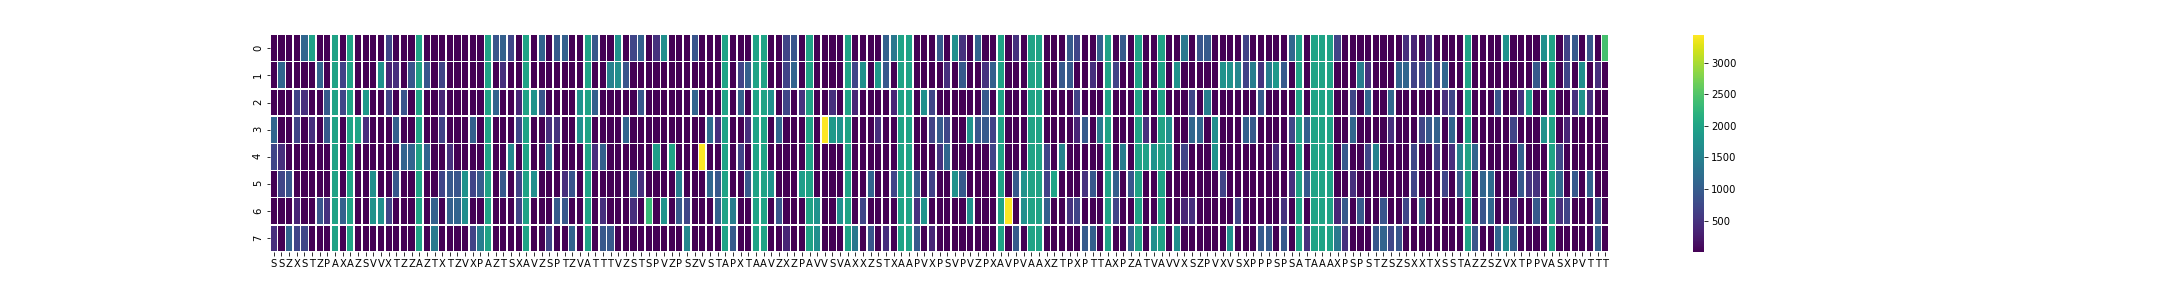

In [28]:
cell_activity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_activity += sum(results.iloc[string_idx]['htm_states']) # RHS sums up the net cellular activity 
                                                                 # for each letter of the string.
        
plt.figure(figsize=(30,4))
activity = sns.heatmap(cell_activity, linewidth=0.5, cmap='viridis', xticklabels=xticks_plot)
activity.set_xticklabels(labels=xticks_plot, rotation=0)
plt.show()

### Total Cell Activity – Character-wise

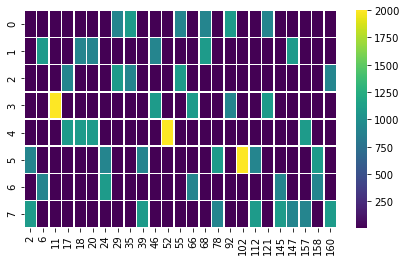

array([[   6.,    6.,    6.,    6.,    6.,    6.,    6.,  913., 1093.,
           6.,    6.,    6.,  913.,    6.,  913.,    6., 1093.,    6.,
           6.,  913.,    6.,    6.,    6.,    6.,    6.],
       [   6., 1093.,    6.,    6.,  913.,  913.,    6.,    6.,    6.,
           6.,  913.,    6.,    6.,    6., 1093.,    6.,    6.,    6.,
           6.,    6.,    6., 1093.,    6.,    6.,    6.],
       [   6.,    6.,    6.,  913.,    6.,    6.,    6., 1093.,  913.,
           6.,    6.,    6., 1093.,    6.,    6.,    6.,    6.,    6.,
           6.,    6.,    6.,    6.,    6.,    6.,  913.],
       [   6.,    6., 2000.,    6.,    6.,    6.,    6.,    6.,    6.,
           6., 1093.,    6.,    6., 1093.,    6.,    6.,  913.,    6.,
           6., 1093.,    6.,    6.,    6.,    6.,    6.],
       [   6.,    6.,    6., 1093., 1093., 1093.,    6.,    6.,    6.,
           6.,    6., 2000.,    6.,    6.,    6.,    6.,    6.,    6.,
           6.,    6.,    6.,    6., 1093.,    6.,    6.],


In [45]:
char = 'Z'
char_activity = cell_activity[:,list(charsMC[char])]

plt.figure(figsize=(7,4))
ch_activity = sns.heatmap(char_activity, linewidth=0.5, cmap='viridis', xticklabels=list(charsMC[char]))
plt.show()

char_activity

### Computing Total Cell Predicitivity

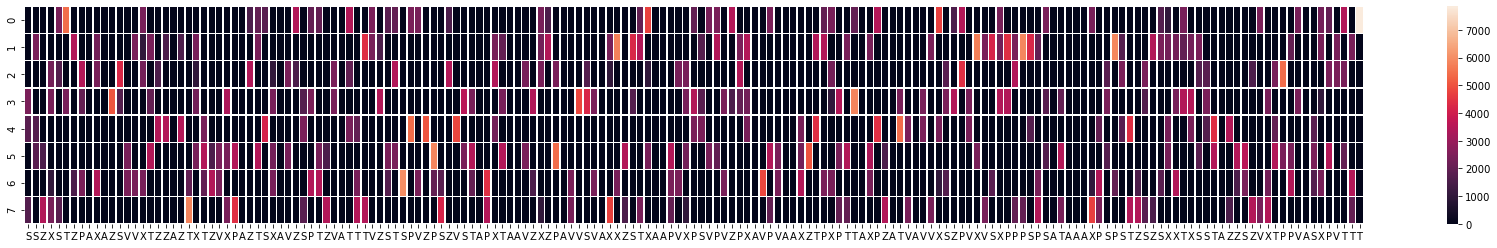

In [46]:
cell_predictivity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_predictivity += sum(results.iloc[string_idx]['htm_preds'])
        
plt.figure(figsize=(30,4))
predictivity = sns.heatmap(cell_predictivity, linewidth=0.5, xticklabels=xticks_plot)
predictivity.set_xticklabels(labels=xticks_plot, rotation=0)
plt.show()

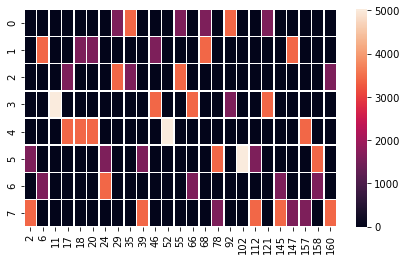

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0., 1592., 3437.,
           0.,    0.,    0., 1592.,    0., 1592.,    0., 3437.,    0.,
           0., 1592.,    0.,    0.,    0.,    0.,    0.],
       [   0., 3437.,    0.,    0., 1592., 1592.,    0.,    0.,    0.,
           0., 1592.,    0.,    0.,    0., 3437.,    0.,    0.,    0.,
           0.,    0.,    0., 3437.,    0.,    0.,    0.],
       [   0.,    0.,    0., 1592.,    0.,    0.,    0., 3437., 1592.,
           0.,    0.,    0., 3437.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 1592.],
       [   0.,    0., 5029.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 3437.,    0.,    0., 3437.,    0.,    0., 1592.,    0.,
           0., 3437.,    0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0., 3437., 3437., 3437.,    0.,    0.,    0.,
           0.,    0., 5029.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 3437.,    0.,    0.],


In [47]:
char = 'Z'
char_predictivity = cell_predictivity[:,list(charsMC[char])]

plt.figure(figsize=(7,4))
ch_predictivity = sns.heatmap(char_predictivity, linewidth=0.5, xticklabels=list(charsMC[char]))
plt.show()

char_predictivity

## 3. Measuring Performance

**Prediction Accuracy:** #correctly predicted cols / #predicted cols 
- Prediction accuracy will be 1.0 if there is only 1 column predicted by the network and that one column is one out of the (say) 50 expected predicted columns, because 1/1 = 1.0. 
- Hence, it only makes sense to compute prediction accuracy when the number of columns predicted by the network is higher than the expected number of correctly predicted columns.

**Prediction Performance:**  moving average over the last 100 sequences

### Prediction Accuracy

In [264]:
pred_acc = []

for string_idx in range(len(in_strings_alpha)):
    
    for char_idx in range(len(results.iloc[string_idx]['htm_preds'])):
        
        correct_preds = out_strings_onehot[string_idx][char_idx] # Correct expected predictions for the 
                                                                 # particular <[string_idx][char_idx]> timestep
        
        predicted_cols_idx = np.where(results.iloc[string_idx]['htm_preds'][char_idx])[1] # Indices of the cols
                                                                 # predicted by the network for particular 
                                                                 # <[string_idx][char_idx]> timestep.
        
        if len(predicted_cols_idx) >= np.count_nonzero(correct_preds):
            
            count=0
            for col_idx in np.where(correct_preds)[0]:
                if col_idx in predicted_cols_idx:
                    count+=1
            
            accuracy = count/len(predicted_cols_idx)
            
            pred_acc.append(accuracy)
            
        else:
            pred_acc.append(0)
        

<IPython.core.display.Javascript object>


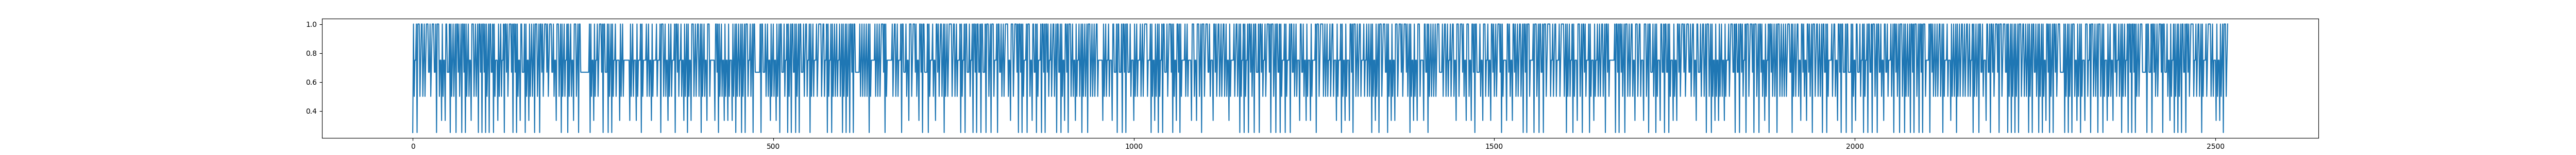

Mean prediction accuracy:  0.7535849458926382


In [284]:
plt.figure(figsize=(50,3))
plt.plot(pred_acc[35000:])
plt.show()

print('Mean prediction accuracy: ', np.mean(pred_acc))

### Prediction Performance

## 4. Visualizing network states, predictions

# ::::::::::::::::::::::::::::::::::::::::::ROUGH:::::::::::::::::::::::::::::::::::::::::::::::::::::

In [219]:
results.iloc[222]['htm_preds'][4]

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [244]:
p = np.zeros(N)
p[np.where(results.iloc[222]['htm_preds'][4])[1]] = 1
print(p)
np.where(results.iloc[222]['htm_preds'][4])[1]

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1.]


array([ 21,  33,  47,  88, 102, 109, 149, 174,   0,  11,  31,  57,  65,
        82,  90, 119, 129, 130,  12,  16,  59,  61,  78,  86, 113, 135,
       141, 164, 168, 171,  39,  62,  81, 114, 118, 134, 140, 162,  23,
        83,  98,  99, 104, 121, 128,   1,  19,  22,  27,  40,  42,  72,
        92, 106, 110, 122, 157, 172,  37,  49,  60,  95,  97, 108, 136,
       165, 170,  24,  30,  36,  46,  53, 103, 115, 163])

In [234]:
np.shape(results.iloc[4999]['htm_preds'])

(6, 8, 175)

In [255]:
np.where(out_strings_onehot[4999][0])[0]

array([  6,   7,   8,  10,  13,  14,  17,  20,  28,  32,  48,  50,  55,
        63,  64,  66,  69,  70,  71,  74,  75,  77,  79,  93,  96, 101,
       105, 107, 111, 116, 127, 131, 132, 133, 137, 139, 144, 146, 147,
       148, 151, 152, 154, 155, 159, 160, 166, 167, 169, 173])

In [263]:
a = np.array([1, 0, 0, 1, 0, 1, 1, 0, 1])
b = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1])


count=0
for col_idx in np.where(a)[0]:
    if col_idx in np.where(b)[0]:
        count+=1

accuracy = count/len(np.where(b)[0])

accuracy

0.5

In [56]:
#np.shape(results.iloc[0]['htm_states'])

sum(results.iloc[1]['htm_states'])

array([[1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       ...,
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.],
       [1., 1., 2., ..., 1., 2., 1.]])